In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import math

In [5]:
df = pd.read_csv('houseprices.csv');
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
x = math.floor(df['bedrooms'].median());
df.bedrooms.fillna(x, inplace=True)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
reg.predict([[3200,4,18]])

array([615307.4140366])

In [17]:
reg.coef_ 

array([  112.06244194, 23388.88007794, -3231.71790863])

In [18]:
reg.intercept_

221323.00186540408

In [20]:
df['price_predict'] = reg.predict(df[['area', 'bedrooms', 'age']])
df

,area,bedrooms,age,price,price_predict
0,2600,3.0,20,550000,518217.632976
1,3000,4.0,15,565000,602590.079374
2,3200,4.0,18,610000,615307.414037
3,3600,3.0,30,595000,597962.895832
4,4000,5.0,8,760000,760663.426755
5,4100,6.0,8,810000,795258.551027


In [11]:
#plt.scatter(df.area,df.bedrooms,df.age, df.price, color='red')
#plt.plot(df[['area','bedrooms','age']], reg.price, color='green')

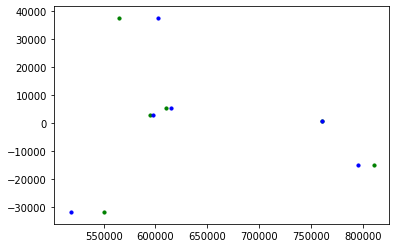

In [22]:
## plotting residual errors in training data 
plt.scatter(df.price, df.price_predict - df.price, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(df.price_predict, df.price_predict - df.price, 
            color = "blue", s = 10, label = 'Test data') 

In [12]:
x1=df.area
x1 = abs((x1 - np.mean(x1))/(np.max(x1)-np.min(x1)))
x1

0    0.544444
1    0.277778
2    0.144444
3    0.122222
4    0.388889
5    0.455556
Name: area, dtype: float64

In [13]:
x2=df.bedrooms
x2 = abs((x2 - np.mean(x2))/(np.max(x2)-np.min(x2)))
x2

0    0.388889
1    0.055556
2    0.055556
3    0.388889
4    0.277778
5    0.611111
Name: bedrooms, dtype: float64

In [14]:
x3=df.age
x3 = abs((x3 - np.mean(x3))/(np.max(x3)-np.min(x3)))
x3
        

0    0.159091
1    0.068182
2    0.068182
3    0.613636
4    0.386364
5    0.386364
Name: age, dtype: float64

In [16]:
# Multivariante linear regression using gradient descent 
# def gradient_descent(x1,x2,x3,y):
#     m1=m2=m3=c=0;
#     n=len(x1);
#     alpha=0.000001;
#     iteration=10;
#     for i in range(iteration):
#         y_pred = m1*x1 + m2*x2 + m3*x3 + c;
#         cost = 1/(2*n)*sum((y-y_pred)**2)
#         x0 = -2/n*sum(y-y_pred);
#         x1 = -2/n*sum(x1*(y-y_pred));
#         x2 = -2/n*sum(x2*(y-y_pred));
#         x3 = -2/n*sum(x3*(y-y_pred));
#         m1 = m1-alpha*x1;
#         m2 = m2-alpha*x2;
#         m3 = m3-alpha*x3;
#         c = c-alpha*x0;
#         print(cost)
#         print(y_pred)
#         print(str(m1) + " " + str(m2) + " " + str(m3) + " " +str(c))
        
#     print(n);
#     return m1,m2,m3

# m1,m2,m3 = gradient_descent(x1,x2,x3,df.price)
